In [1]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install qiskit-ibmq-provider

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load your IBM Q account
from qiskit import IBMQ

IBMQ.save_account('0c5b2835672517fb24d1ecd812570bac90ef6628b742d93906192c0a587d2ef0511a7e51bb9bc3c4530949c2ef46a084a88054a29e0a5ff2ad84c82fbad76cb7', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
ibmbrisbane_backend = provider.get_backend('ibm_brisbane')

C:\Users\pc\AppData\Local\Temp\ipykernel_8384\980572955.py:4: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('0c5b2835672517fb24d1ecd812570bac90ef6628b742d93906192c0a587d2ef0511a7e51bb9bc3c4530949c2ef46a084a88054a29e0a5ff2ad84c82fbad76cb7', overwrite=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_8384\980572955.py:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMP

In [17]:
from qiskit import IBMQ

# Load IBM Q account
IBMQ.load_account()

# Get the provider and backend
provider = IBMQ.get_provider(hub='ibm-q')
ibmbrisbane_backend = provider.get_backend('ibm_brisbane')

# Check the backend status
status = ibmbrisbane_backend.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs

print(f"Operational: {is_operational}")
print(f"Jobs in queue: {jobs_in_queue}")

ibmqfactory.load_account:WARNING:2023-11-21 13:39:44,620: Credentials are already in use. The existing account in the session will be replaced.


Operational: True
Jobs in queue: 58


In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit.tools.monitor import job_monitor

#State Initialisation
qc_detect = QuantumCircuit(9, 4)
qc_detect.initialize([1, 0], 0)

#Encoding using CX gate from 0 to 00000 as for 5-Qubit
qc_detect.cx(0, 1)
qc_detect.cx(0, 2)
qc_detect.cx(0, 3)
qc_detect.cx(0, 4)
qc_detect.barrier()

# Introduce a bit flip error on the third qubit
qc_detect.x(2)  
qc_detect.barrier()

#Syndrome measurement pairs
qc_detect.cx(0, 5)
qc_detect.cx(1, 5)
qc_detect.cx(1, 6)
qc_detect.cx(2, 6)
qc_detect.cx(2, 7)
qc_detect.cx(3, 7)
qc_detect.cx(3, 8)
qc_detect.cx(4, 8)
qc_detect.barrier()

#Measure the ancilla qubits to get the error syndrome
qc_detect.measure(5, 0)
qc_detect.measure(6, 1)
qc_detect.measure(7, 2)
qc_detect.measure(8, 3)

# Transpile for the real quantum device
transpiled_qc_detect = transpile(qc_detect, ibmbrisbane_backend)

# Specify the number of shots
num_shots = 1024

# Submitting the job to the real quantum device
job_detect = ibmbrisbane_backend.run(transpiled_qc_detect,shots=num_shots)
job_monitor(job_detect)

# Retrieve and print the result
result_detect = job_detect.result()
error_counts_detect = result_detect.get_counts(qc_detect)
print("Error Detection Counts on Real Quantum Computer for 5-Qubit:")
print(error_counts_detect)


Job Status: job has successfully run
Error Detection Counts on Real Quantum Computer for 5-Qubit:
{'0011': 86, '0100': 29, '0101': 34, '1110': 38, '1001': 5, '0110': 224, '0010': 41, '1111': 72, '0111': 377, '1000': 2, '0001': 22, '1100': 3, '0000': 21, '1011': 37, '1010': 25, '1101': 8}


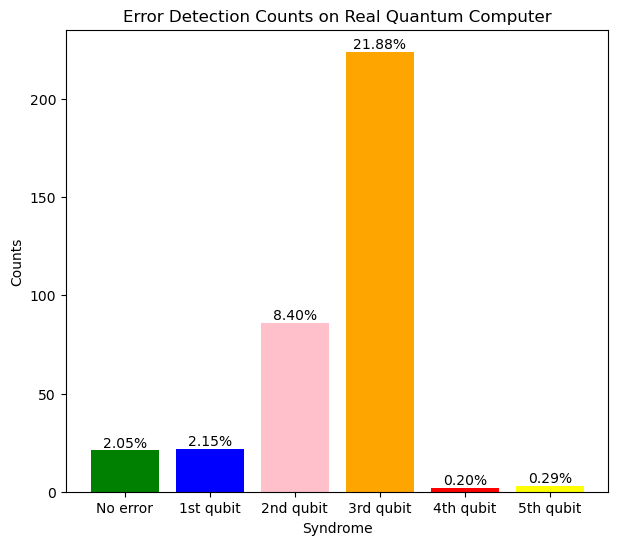

In [9]:
#visualisatiob of Resulting syndromes or detected errors on histogram
import matplotlib.pyplot as plt

# Error detection counts
error_counts = {'0000': 21, '1000': 2, '1100': 3, '0110': 224, '0011': 86,'0001': 22}
total_shots = 1024
labels = ['No error','1st qubit', '2nd qubit', '3rd qubit', '4th qubit', '5th qubit']
colors = ['green', 'blue', 'pink', 'orange','red', 'yellow']

# Calculate percentages
percentages = {key: (value / total_shots) * 100 for key, value in error_counts.items()}

# Prepare data for plotting
counts = [error_counts[key] for key in sorted(error_counts.keys())]
percentages_list = [percentages[key] for key in sorted(error_counts.keys())]
x_pos = range(len(error_counts))

# Create bar plot
plt.figure(figsize=(7, 6))
bars = plt.bar(x_pos, counts, color=colors)

# Add labels and title
plt.xlabel('Syndrome')
plt.ylabel('Counts')
plt.title('Error Detection Counts on Real Quantum Computer')
plt.xticks(x_pos, labels)

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, percentages_list):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', ha='center', va='bottom', color='black')

# Show the plot
plt.show()


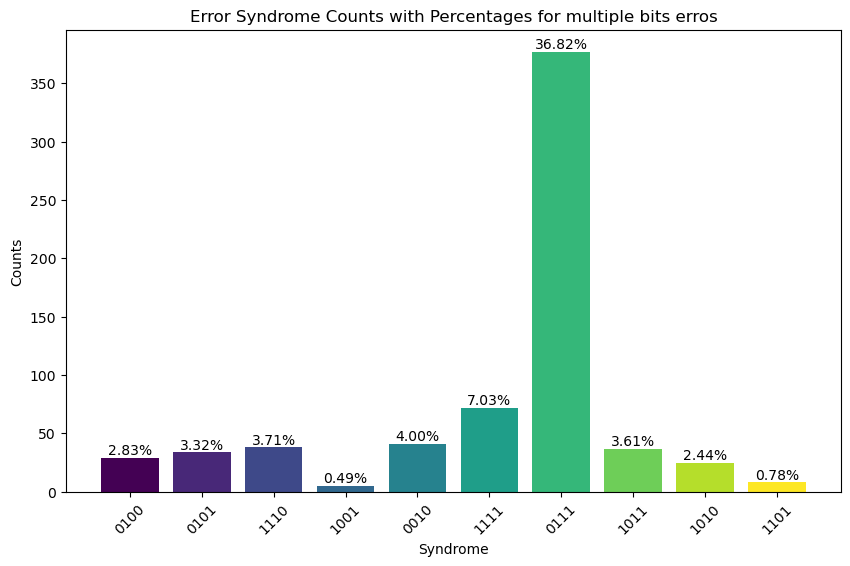

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# The filtered syndrome counts
filtered_counts = {
    '0100': 29, '0101': 34, '1110': 38, '1001': 5, '0010': 41, 
    '1111': 72, '0111': 377, '1011': 37, '1010': 25, '1101': 8
}

# Calculate the total number of counts
total_counts = 1024

# Convert counts to percentages
percentages = {syndrome: (count / total_counts) * 100 for syndrome, count in filtered_counts.items()}

# Set up the figure and axis
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
syndrome_labels = list(filtered_counts.keys())
counts = list(filtered_counts.values())
percent_labels = [f"{percent:.2f}%" for percent in percentages.values()]

# Generate a color palette
color_palette = plt.cm.viridis(np.linspace(0, 1, len(filtered_counts)))

# Create the bar chart with different colors
bars = plt.bar(syndrome_labels, counts, color=color_palette)

# Add the percentage labels above the bars
for bar, percent_label in zip(bars, percent_labels):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, percent_label, ha='center', va='bottom')

# Add labels and title
plt.xlabel('Syndrome')
plt.ylabel('Counts')
plt.title('Error Syndrome Counts with Percentages for multiple bits erros')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


In [18]:
#Error Correction Circuit on the real IBM

from qiskit import QuantumCircuit, transpile
from qiskit.tools.monitor import job_monitor

# Syndrome counts from the detection circuit
syndrome_counts = {'1000': 2, '1100': 3, '0110': 224, '0011': 86, '0001': 22}

# Define error syndrome to qubit mapping
syndrome_to_qubit = {'1000': 4, '1100': 3, '0110': 2, '0011': 1, '0001': 0}
corrected_results = {}

# Iterate over detected syndromes and correct them
for syndrome, _ in syndrome_counts.items():
    # Create error correction circuit
    qubit_to_correct = syndrome_to_qubit[syndrome]
    qc_correct = QuantumCircuit(5, 5)
    qc_correct.x(qubit_to_correct)  # Apply correction
    qc_correct.measure(range(5), range(5))

    # Transpile and run the circuit
    transpiled_qc_correct = transpile(qc_correct, ibmbrisbane_backend)
    job = ibmbrisbane_backend.run(transpiled_qc_correct, shots=num_shots_correction)
    job_monitor(job)

    # Retrieve and store the result
    result = job.result()
    corrected_counts = result.get_counts(qc_correct)
    corrected_results[syndrome] = corrected_counts
    print(f"Corrected Counts for Syndrome '{syndrome}': {corrected_counts}")

# Output the corrected results
print("\nAll Corrected Results:")
print(corrected_results)


Job Status: job has successfully run
Corrected Counts for Syndrome '1000': {'10011': 4, '11100': 1, '00010': 1, '10100': 3, '01010': 1, '10010': 31, '01000': 5, '00001': 3, '10000': 819, '11001': 2, '10001': 111, '00000': 22, '01001': 1, '11000': 20}
Job Status: job has successfully run
Corrected Counts for Syndrome '1100': {'00001': 2, '01011': 4, '01101': 1, '11001': 3, '01000': 818, '11000': 21, '00101': 1, '00000': 13, '01010': 32, '01001': 124, '01100': 3, '10000': 1, '10001': 1}
Job Status: job has successfully run
Corrected Counts for Syndrome '0110': {'10110': 1, '00100': 822, '01101': 5, '00110': 25, '00101': 113, '00001': 2, '01000': 1, '00111': 3, '01110': 1, '01100': 36, '10100': 10, '00000': 5}
Job Status: job has successfully run
Corrected Counts for Syndrome '0011': {'01011': 5, '00110': 5, '11010': 1, '00001': 1, '10011': 2, '00010': 854, '00000': 20, '00100': 1, '00111': 1, '10010': 10, '00011': 91, '01010': 32, '11011': 1}
Job Status: job has successfully run
Correcte